In [32]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np
from gseapy import Msigdb, barplot, dotplot
import time

In [3]:
df = pd.read_csv('scRNA_markers.csv').dropna()
df

,Gene,scores,pval_adj,lfc,cluster
0,IGKC,195.531631,0.000000e+00,3.968596,0
1,IGLC3,130.699707,0.000000e+00,3.504980,0
2,IGLC2,107.046463,0.000000e+00,3.309604,0
3,IGHA1,105.057930,0.000000e+00,2.908424,0
4,IGHG3,99.278496,0.000000e+00,3.100117,0
...,...,...,...,...,...
55530,HLA-DRA,-6.511676,3.382969e-09,-2.057503,8
55531,HSP90AA1,-7.524796,4.249715e-12,-1.049865,8
55532,FTH1,-7.855478,3.939762e-13,-1.248424,8
55533,IGKC,-8.722092,4.631632e-16,-3.059638,8


In [4]:
df['Rank'] = -np.log10(df.pval_adj)*df.lfc
df = df.sort_values('Rank', ascending = False).reset_index(drop = True)
df.head(25000)

/Users/pankti/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Gene,scores,pval_adj,lfc,cluster,Rank
0,IGKC,195.531631,0.000000e+00,3.968596,0,inf
1,CASP4,68.853699,0.000000e+00,1.669617,2,inf
2,UFM1,68.833199,0.000000e+00,1.498878,2,inf
3,ARF4,68.822060,0.000000e+00,1.263861,2,inf
4,WBP2,68.813339,0.000000e+00,1.846240,2,inf
...,...,...,...,...,...,...
24995,NSA2,8.971131,4.614595e-18,1.083636,6,18.785772
24996,NDNF,4.083744,2.127387e-04,5.114896,6,18.782684
24997,TAX1BP3,5.738480,2.777301e-07,2.863972,8,18.777279
24998,INTS10,7.551277,4.493198e-13,1.520636,6,18.775971


In [5]:
ranking = df[['Gene', 'Rank']]
ranking.head()

,Gene,Rank
0,IGKC,inf
1,CASP4,inf
2,UFM1,inf
3,ARF4,inf
4,WBP2,inf


We can see the gene set libraries that we can use for enrichment. 

In [6]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [37]:
t1 = time.time()
pre_res = gp.prerank(rnk=ranking, gene_sets = 'MSigDB_Oncogenic_Signatures', seed = 6, permutation_num = 100)
t2 = time.time()
pre_res.ranking.shape

2024-04-14 00:05:52,086 [WARNING] Input gene rankings contains inf values!
/Users/pankti/anaconda3/lib/python3.11/site-packages/gseapy/gsea.py:394: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rankser.replace(-np.inf, method="ffill", inplace=True)
/Users/pankti/anaconda3/lib/python3.11/site-packages/gseapy/gsea.py:395: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rankser.replace(np.inf, method="bfill", inplace=True)
2024-04-14 00:05:52,088 [WARNING] Duplicated values found in preranked stats: 17.41% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


(55535,)

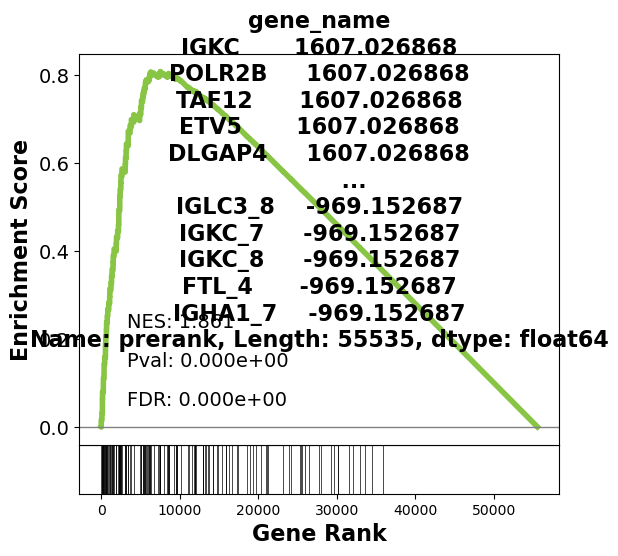

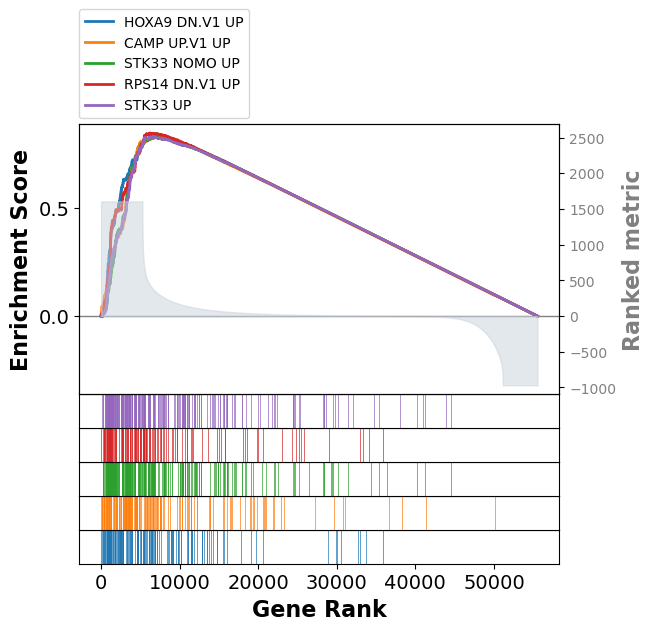

In [42]:
term = pre_res.res2d.Term
gseaplot(pre_res.ranking, **pre_res.results[term[i]])
axs = pre_res.plot(terms=term[:5])

In [8]:
out = []
for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']
               ])
out_df = pd.DataFrame(out, columns = ['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,KRAS.DF.V1 UP,0.000000,0.784679,1.728743
1,TGFB UP.V1 DN,0.000000,0.783032,1.715386
2,KRAS.300 UP.V1 DN,0.000000,0.775258,1.618204
3,PRC1 BMI UP.V1 UP,0.000000,0.746583,1.643824
4,BMI1 DN.V1 UP,0.000000,0.769546,1.649898
...,...,...,...,...
183,CAHOY NEURONAL,0.001671,0.739086,1.474101
184,KRAS.50 UP.V1 DN,0.005875,0.810216,1.406567
185,YAP1 DN,0.006551,0.755198,1.402560
186,SINGH KRAS DEPENDENCY SIGNATURE,0.009041,0.776318,1.377628


In [9]:
gene_list = ['SCARA3', 'LOC100044683', 'CMBL', 'CLIC6', 'IL13RA1', 'TACSTD2', 'DKKL1',
'CSF1', 'CITED1', 'SYNPO2L']

In [10]:
term_to_graph = out_df.iloc[186].Term
term_to_graph

'SINGH KRAS DEPENDENCY SIGNATURE '

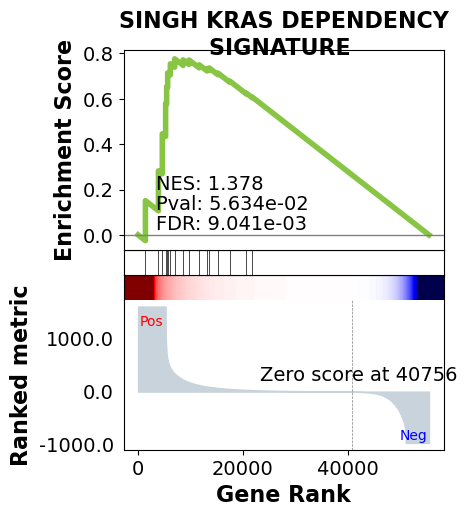

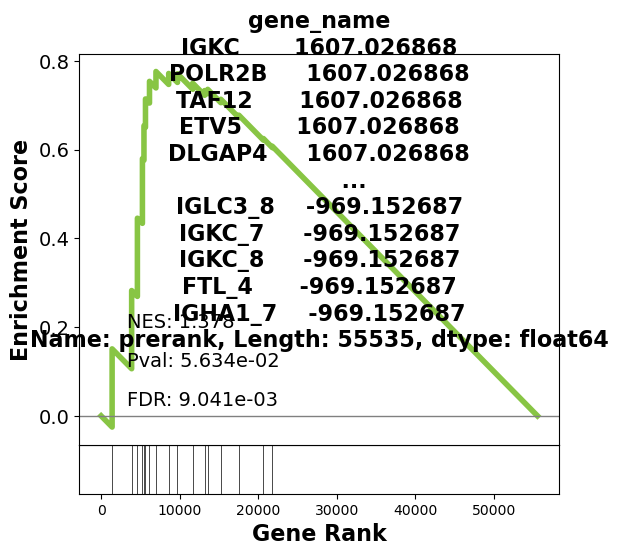

In [11]:
plot = gseaplot(pre_res.ranking, **pre_res.results[term_to_graph],
        axs = pre_res.plot(terms=term_to_graph))

In [12]:
type(out_df.Term)

pandas.core.series.Series

In [16]:
lung_items = out_df.Term.str.contains('lung', case=False)
lung_cancer = out_df[lung_items]
lung_cancer.Term

# term_to_graph = out_df.iloc[186].Term
# term_to_graph

78            KRAS.AMP.LUNG UP.V1 UP
123               KRAS.LUNG UP.V1 UP
124        KRAS.LUNG.BREAST UP.V1 UP
134    KRAS.600.LUNG.BREAST UP.V1 UP
136           KRAS.AMP.LUNG UP.V1 DN
144    KRAS.600.LUNG.BREAST UP.V1 DN
165               KRAS.LUNG UP.V1 DN
173        KRAS.LUNG.BREAST UP.V1 DN
Name: Term, dtype: object

In [29]:

pathwayname = {}
for i in range(len(lung_cancer)):
    pathwayname[i] = lung_cancer.iloc[i].Term
    
pathwayname    



# Define pathway names and their corresponding results
# pathways = {
#     'Pathway 1': pre_res.results['pathway1'],
#     'Pathway 2': pre_res.results['pathway2']
# }

# # # Define colors for each pathway
# colors = ['blue', 'red', 'green', 'orange', 'yellow', 'brown', 'black', 'purple']

# # Plot each pathway in a loop
# for pathway_name, pathway_results, color in zip(pathways.keys(), pathways.values(), colors):
#     gseaplot(pre_res.ranking, title=pathway_name, linecolor=color, ylabel='Enrichment Score')

# # Show the plot
# plt.show()


# gseaplot(pre_res.ranking, **pre_res.results[lung_cancer],
#         axs = pre_res.plot(terms=lung_cancer))

TypeError: unhashable type: 'slice'

In [30]:
# for i in range(len(pathwayname)):
#     pathways = {
#         pathwayname[i]:pre_res.results[pathwayname[i]]
#     }

gseaplot(pre_res.ranking, **pre_res.results[pathwayname[i]],
        axs = pre_res.plot(terms=pathwayname[:5]))

# pre_res.results['KRAS.LUNG UP.V1 UP']

TypeError: unhashable type: 'slice'

In [21]:
len(lung_cancer)

8